In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import cifar10 # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

Load dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
print("train image shape:", train_images.shape)
print("train label shape:", train_labels.shape)
print("--------------------")
print("test image shape:", test_images.shape)
print("test label shape:", test_labels.shape)

train image shape: (50000, 32, 32, 3)
train label shape: (50000, 1)
--------------------
test image shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Normalize images

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Main Statistics of dataset

In [7]:
train_mean = np.mean(train_images)
train_std = np.std(train_images)
print("train mean:", train_mean)
print("train std:", train_std)
print("--------------------")
test_mean = np.mean(test_images)
test_std = np.std(test_images)
print("test mean:", test_mean)
print("test std:", test_std)

train mean: 0.4733630004850874
train std: 0.25156892506322026
--------------------
test mean: 0.47658492059844665
test std: 0.2512194906784146


Print some examples to understand the dataset

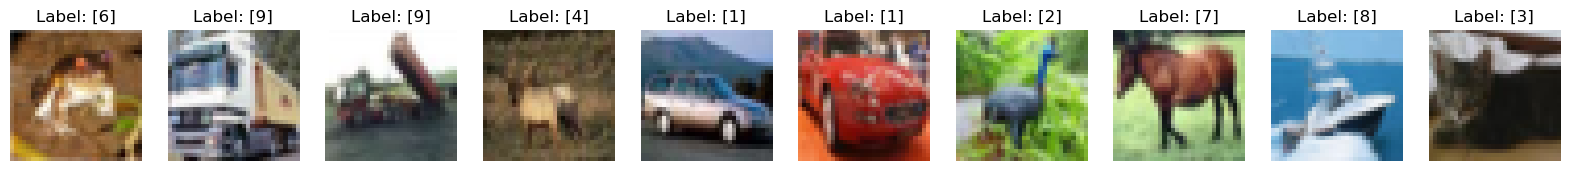

In [8]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    axes[i].imshow(train_images[i].squeeze(), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {train_labels[i]}")
plt.show()

Create Tensorflow datasets

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator()

train_ds = train_datagen.flow(train_images, train_labels, batch_size=64, shuffle=False)
test_ds = test_datagen.flow(test_images, test_labels, batch_size=64, shuffle=False)

Defined basic CNN model

In [10]:
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model with learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

model.summary()

c:\Users\sahas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,256,906 (12.42 MB)

 Trainable params: 3,254,090 (12.41 MB)

 Non-trainable params: 2,816 (11.00 KB)

compile the model

In [11]:
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [12]:
model.fit(train_ds, epochs=10)

Epoch 1/10


c:\Users\sahas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 129ms/step - accuracy: 0.3335 - loss: 2.1464
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step - accuracy: 0.5481 - loss: 1.2689
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 140ms/step - accuracy: 0.6409 - loss: 1.0139
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 141ms/step - accuracy: 0.6922 - loss: 0.8752
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 141ms/step - accuracy: 0.7304 - loss: 0.7783
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 140ms/step - accuracy: 0.7505 - loss: 0.7187
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.7678 - loss: 0.6765
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 127ms/step - accuracy: 0.7824 - loss: 0.6284
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.7940 - loss: 0.5911
Epoch 10/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.8070 - loss: 0.5579


check test accuracy

In [13]:
base_model_loss, base_model_accuracy = model.evaluate(test_ds)
print(f"Base Model Test Accuracy: {base_model_accuracy * 100:.2f} %")

c:\Users\sahas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8114 - loss: 0.5520
Base Model Test Accuracy: 81.26 %


Save the model

In [16]:
model.save("cifar10_cnn_model.keras")

Check size of saved model

In [17]:
model_size = os.path.getsize("cifar10_cnn_model.keras") / (1024 * 1024)
print(f"Saved model size: {model_size:.2f} MB")

Saved model size: 37.36 MB


Convert to TFLite model

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\sahas\AppData\Local\Temp\tmphifxu2ra\assets


INFO:tensorflow:Assets written to: C:\Users\sahas\AppData\Local\Temp\tmphifxu2ra\assets


Saved artifact at 'C:\Users\sahas\AppData\Local\Temp\tmphifxu2ra'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1433935694544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935695312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935694736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935694928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935695888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935697424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935698000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935698192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935697040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  143393

Save TFLite model

In [19]:
with open("cifar10_cnn_model.tflite", "wb") as f:
    f.write(tflite_model)

Check size of TFLite model

In [20]:
tflite_model_size = os.path.getsize("cifar10_cnn_model.tflite") / (1024 * 1024)
print(f"TFLite model size: {tflite_model_size:.2f} MB") 

TFLite model size: 12.42 MB


Evaluate the model to get test accuracy

In [22]:
interpreter = tf.lite.Interpreter(model_path="cifar10_cnn_model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

correct = 0
total = len(test_images)
for i in range(total):
    input_data = np.expand_dims(test_images[i], axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    if np.argmax(output_data) == test_labels[i]:
        correct += 1

accuracy = correct / total
print(f"TFLite Model Accuracy: {accuracy * 100:.2f} %")

TFLite Model Accuracy: 81.26 %


Convert to TFLite using Float16 quantization

In [24]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\sahas\AppData\Local\Temp\tmpvc3j1qov\assets


INFO:tensorflow:Assets written to: C:\Users\sahas\AppData\Local\Temp\tmpvc3j1qov\assets


Saved artifact at 'C:\Users\sahas\AppData\Local\Temp\tmpvc3j1qov'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1433935694544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935695312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935694736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935694928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935694352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935695888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935697424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935698000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935698192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1433935697040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  143393

Save quantized model

In [25]:
with open("cifar10_cnn_quant_model.tflite", "wb") as f:
    f.write(tflite_model_quant)

Check the model size

In [26]:
tflite_model_quant_size = os.path.getsize("cifar10_cnn_quant_model.tflite") / (1024 * 1024)
print(f"Quantized TFLite model size: {tflite_model_quant_size:.2f} MB")

Quantized TFLite model size: 6.22 MB


In [27]:
interpreter_quant = tf.lite.Interpreter(model_path="cifar10_cnn_quant_model.tflite")
interpreter_quant.allocate_tensors()
input_details = interpreter_quant.get_input_details()
output_details = interpreter_quant.get_output_details()

correct_quant = 0
for i in range(total):
    input_data = np.expand_dims(test_images[i], axis=0).astype(np.float32)
    interpreter_quant.set_tensor(input_details[0]['index'], input_data)
    interpreter_quant.invoke()
    output_data = interpreter_quant.get_tensor(output_details[0]['index'])
    if np.argmax(output_data) == test_labels[i]:
        correct_quant += 1

accuracy_quant = correct_quant / total
print(f"Quantized TFLite Model Accuracy: {accuracy_quant * 100:.2f} %")

Quantized TFLite Model Accuracy: 81.27 %


In [30]:
comparison_data = {
    "Model Type": ["Base Model", "TFLite Model", "Quantized TFLite Model"],
    "Accuracy": [base_model_accuracy, accuracy, accuracy_quant],
    "Size (MB)": [model_size, tflite_model_size, tflite_model_quant_size],
    "Size Reduction (%)": [0, 
                            ((model_size - tflite_model_size) / model_size) * 100, 
                            ((model_size - tflite_model_quant_size) / model_size) * 100]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

               Model Type  Accuracy  Size (MB)  Size Reduction (%)
0              Base Model    0.8126  37.355306            0.000000
1            TFLite Model    0.8126  12.418106           66.756781
2  Quantized TFLite Model    0.8127   6.216419           83.358671
